<a href="https://colab.research.google.com/github/princeKike27/Roller-Coaster/blob/main/Roller_Coaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
roller_coasters = 'https://raw.githubusercontent.com/princeKike27/Roller-Coaster/main/roller_coasters.csv'
steel_winners = 'https://raw.githubusercontent.com/princeKike27/Roller-Coaster/main/Golden_Ticket_Award_Winners_Steel.csv'
wood_winners = 'https://raw.githubusercontent.com/princeKike27/Roller-Coaster/main/Golden_Ticket_Award_Winners_Wood.csv'

df_coasters = pd.read_csv(roller_coasters)
df_steel = pd.read_csv(steel_winners)
df_wood = pd.read_csv(wood_winners)

# Roller Coasters Ranking per Category - Steel / Wood

In [3]:
# steel gold winners
df_steel.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


In [4]:
# wooden gold winners
df_wood.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [5]:
# number of rollercoasters in each ranking dataset
wood_winners_count = len(df_wood['Name'])
steel_winners_count = len(df_steel['Name'])

print(f'Number of Roller-Coasters in Gold Wood Award Winners: {wood_winners_count}')
print(f'Number of Roller-Coasters in Gold Steel Award Winners: {steel_winners_count}')


Number of Roller-Coasters in Gold Wood Award Winners: 180
Number of Roller-Coasters in Gold Steel Award Winners: 180


In [6]:
# Avg points scored per supplier in each year
wood_suppliers = df_wood.groupby(['Supplier', 'Year of Rank']).Points.mean().reset_index()
wood_suppliers_pivot = wood_suppliers.pivot(
    index = 'Supplier',
    columns = 'Year of Rank',
    values = 'Points'
).reset_index().rename_axis(None,axis=1)


steel_suppliers = df_steel.groupby(['Supplier', 'Year of Rank']).Points.mean().reset_index()
steel_suppliers_pivot = steel_suppliers.pivot(
    index='Supplier',
    columns = 'Year of Rank',
    values = 'Points'
).reset_index().rename_axis(None, axis=1)

In [7]:
print('Wood Category Awards Avg Points Scored per Supplier')
wood_suppliers_pivot.head(3)

Wood Category Awards Avg Points Scored per Supplier


,Supplier,2013,2014,2015,2016,2017,2018
0,Allen/PTC,NaN,NaN,NaN,NaN,NaN,117.0
1,CCI,818.5,1480.0,1625.0,NaN,NaN,NaN
2,Custom Coasters,NaN,NaN,NaN,283.333333,310.0,285.0


In [8]:
print('Steel Category Awards Avg Points Scored per Supplier')
steel_suppliers_pivot.head()

Steel Category Awards Avg Points Scored per Supplier


,Supplier,2013,2014,2015,2016,2017,2018
0,Arrow,416.00,NaN,NaN,240.500000,227.500000,231.0
1,B&M,527.50,489.166667,561.666667,251.045455,277.473684,257.9
2,Chance,NaN,NaN,NaN,90.000000,78.000000,NaN
3,Intamin,806.25,984.000000,949.333333,435.500000,451.000000,393.0
4,Lagoon,NaN,NaN,NaN,92.000000,163.000000,92.0


In [9]:
# function to plot ranking of a given Roller Coaster over the years 
def roller_coaster_ranking(coaster, dataset, parkname):
  # find coaster in dataset
  coaster_info = dataset[(dataset['Name'] == coaster) & (dataset['Park'] == parkname)]
  # x values
  year_labels = coaster_info['Year of Rank'].values
  # y values
  ranking = coaster_info['Rank'].values

  # plot line-graph
  ax = plt.subplot()
  plt.plot(year_labels, ranking, color='crimson')
  # y axis inverted since a rank of 1 is better than 3
  ax.invert_yaxis()
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.title(f'{coaster} Rankings in {parkname}')

  plt.show()

  return (year_labels, ranking)


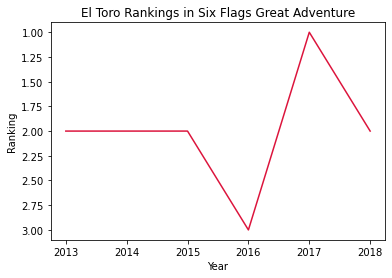

(array([2013, 2014, 2015, 2016, 2017, 2018]), array([2, 2, 2, 3, 1, 2]))

In [10]:
# check function with 'El Toro' Roller Coaster in 'Six Flags Great Adventure'
roller_coaster_ranking('El Toro', df_wood, 'Six Flags Great Adventure')

In [11]:
# check validity of graph
df_wood[df_wood['Name'] == 'El Toro']

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
11,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1291,2014
21,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1464,2015
32,3,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1121,2016
55,25,El Toro,Freitzeitpark Plohn,"Legendfeld, Germany",Great Coasters Int.,2009,166,2016
80,1,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2009,1241,2017
120,41,El Toro,Freitzeitpark Plohn,"Legendfeld, Germany",Great Coasters Int.,2006,92,2017
131,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1197,2018


# Roller Coaster Statistics

In [12]:
# inspect dataframe
df_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [13]:
# check column types
df_coasters.dtypes

name               object
material_type      object
seating_type       object
speed             float64
height            float64
length            float64
num_inversions    float64
manufacturer       object
park               object
status             object
dtype: object

# Speed, Height, Length & Inversions Histograms

In [14]:
# function that plots a histogram for each numeric column in df
def plot_histogram(df):
  # store columns names
  columns = df.columns

  plt.figure(figsize=(25,5))
  # column position of graph
  fig_pos = 1

  for column in columns:
    # check if column is numeric
    if df.dtypes[column] == 'float64':
      # plot histogram
      
      ax = plt.subplot(1, 4, fig_pos)

      plt.hist(df[column], bins=10, color='purple')
      plt.ylabel('Frequency')
      plt.xlabel(column)
      plt.title(f'Roller Coaster\'s {column}')
      fig_pos += 1
  plt.show()



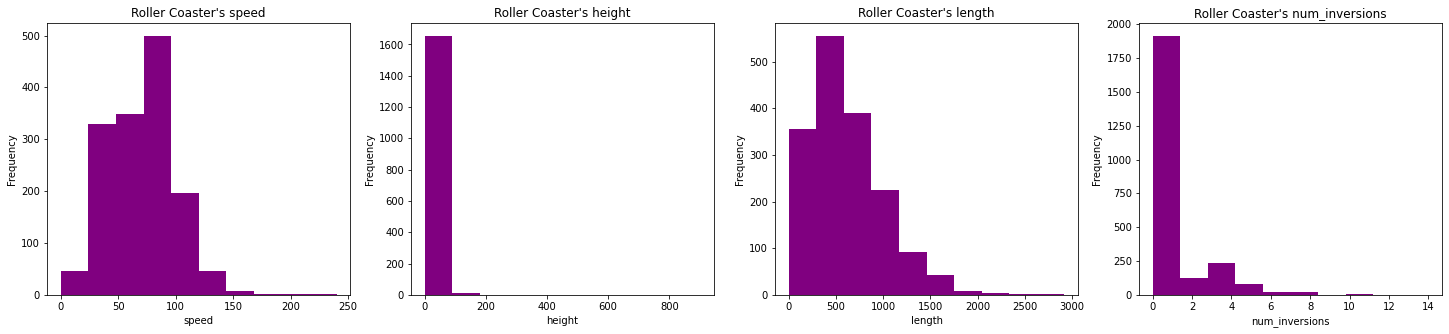

In [15]:
# test function
coasters_hist = plot_histogram(df_coasters)

# Status of Roller Coasters

In [16]:
# group by status of Roller Coaster
coaster_status = df_coasters.groupby('status').name.count().reset_index()
coaster_status.rename(columns={'name': 'count'}, inplace=True)
coaster_status

,status,count
0,status.announced,39
1,status.closed.definitely,439
2,status.closed.temporarily,25
3,status.construction,41
4,status.operating,2172
5,status.relocated,22
6,status.retracked,16
7,status.rumored,11
8,status.unknown,34


In [17]:
# function that plots a pie graph comparing number of operating and closed roller coasters
def coaster_status_pie(df):
  # store status of roller coaster
  status = [df.loc[1, 'status'], df.loc[4, 'status']]
  # store values
  values = [df.loc[1, 'count'], df.loc[4, 'count']]

  # plot pie
  plt.figure(figsize=(10, 8))
  ax = plt.subplot()

  plt.pie(values, labels=status, autopct='%0.2f%%') 
  plt.axis('equal')

  plt.title('Roller Coasters Operating Vs Roller Coasters Closed')
  plt.show()

  return (status, values)
  

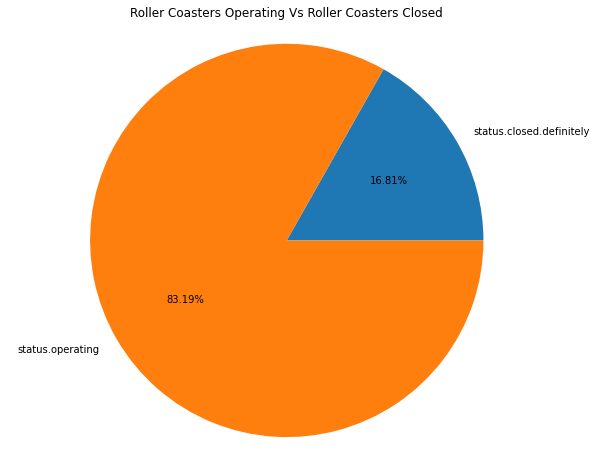

(['status.closed.definitely', 'status.operating'], [439, 2172])

In [18]:
# test function
pie_status = coaster_status_pie(coaster_status)
pie_status


# Does Speed Affect the Length of a Roller Coaster?

In [19]:
# function that plots a scatter plot of two numeric columns
def coaster_scatter(df, xcol, ycol):
  # save values of columns in lists
  xlst = df[xcol]
  ylst = df[ycol]

  # plot scatter plot
  plt.figure(figsize=(12, 8))
  ax = plt.subplot()

  plt.scatter(x=xlst, y=ylst, color='crimson')

  plt.xlabel(xcol)
  plt.ylabel(ycol)
  plt.title(f'Roller Coasters {xcol} Vs {ycol}')
  plt.show()

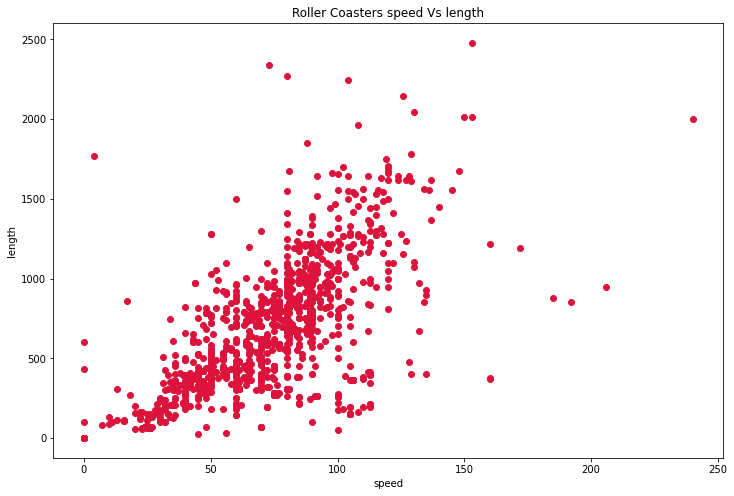

In [20]:
# test function
speed_inversions = coaster_scatter(df_coasters, 'speed', 'length')

# Which Roller Coaster Seating type is more popular?
* Do they have an effect on the speed, height and length?

In [21]:
# function to get avg_speed, avg_length and avg_height
def seating_params(df):
  calc ={}
  calc['count'] = df['name'].count()
  calc['avg_speed'] = df['speed'].mean()
  calc['avg_length'] = df['length'].mean()
  calc['avg_height'] = df['height'].mean()
  return pd.Series(calc, index=['count', 'avg_speed', 'avg_length', 'avg_height'])


In [22]:
# group by seating type
seating_type = df_coasters.groupby('seating_type').apply(seating_params).reset_index()
seating_type.sort_values(by='count', ascending=False, inplace=True)
seating_type

,seating_type,count,avg_speed,avg_length,avg_height
8,Sit Down,2214.0,69.758865,596.763449,26.264180
9,Spinning,150.0,50.060606,386.177215,14.939759
5,Inverted,122.0,80.054545,707.027523,33.178571
11,Suspended,55.0,53.966667,472.314286,20.344828
1,Alpine,43.0,38.333333,864.050000,25.000000
14,na,40.0,NaN,628.000000,19.000000
12,Water Coaster,29.0,76.050000,497.611111,30.347826
3,Floorless,27.0,98.208333,943.520000,45.538462
4,Flying,27.0,70.125000,733.041667,29.720000
6,Motorbike,21.0,71.400000,549.200000,16.583333


In [23]:
# get 5 most common roller coaster seating types
top_5_seating = seating_type.nlargest(5, columns='count')
top_5_seating

,seating_type,count,avg_speed,avg_length,avg_height
8,Sit Down,2214.0,69.758865,596.763449,26.264180
9,Spinning,150.0,50.060606,386.177215,14.939759
5,Inverted,122.0,80.054545,707.027523,33.178571
11,Suspended,55.0,53.966667,472.314286,20.344828
1,Alpine,43.0,38.333333,864.050000,25.000000


In [24]:
import seaborn as sns

# function to plot seating types
def seating_plot(df):
  # store y values of charts
  y_col = df.columns[1::]
  # number of columns to have in each row
  fig_col = 4
  # column position of graph
  fig_pos = 1
  
  plt.figure(figsize=(25, 4))

  for col in y_col:
    ax = plt.subplot(1, fig_col, fig_pos)
    sns.barplot(data=df, x='seating_type', y=col)

    plt.title(f'Roller Coasters {col} by Seating Type')
    fig_pos +=1

  plt.show()
    



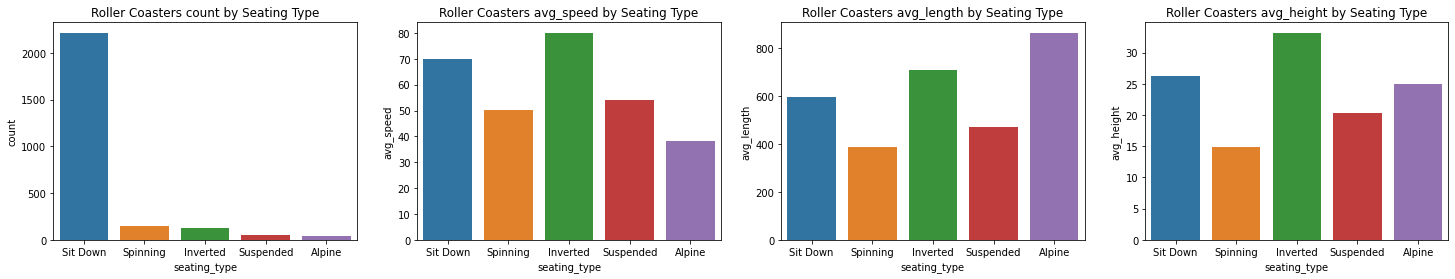

In [25]:
top_5_seating_plot = seating_plot(top_5_seating)